<a href="https://colab.research.google.com/github/TabithaWKariuki/Hypothesis-testing/blob/main/%22Moringa_Data_Science_Core_W4_Independent_Project_2022_05_Tabitha_Kariuki_Python_Notebook_%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib electric car-sharing service company

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> To investigate electric car usage of blue cars during weekdays and weekends considering postal codes 75015 vs 75017 based on the Autolib dataset provided.

### b) Defining the Metric for Success

In order to work on the above problem, I will need to do the following:

1. Find and deal with outliers, anomalies, and missing data within the dataset.
2. Plot appropriate univariate and bivariate summaries recording our observations.
3. Implement the solution by performing hypothesis testing. This will need to be documented when writing the report. 

### c) Understanding the context 

We have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made

### e) Data Relevance

The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging).The data provided aligns with the context of our study.
The dataset and glossary to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset and here [http://bit.ly/DSCoreAutolibDatasetGlossary] respectively.

## 2. Reading the Data

In [1]:
#To avoid printing out warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the libraries
#

# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

from scipy import stats

import math

import scipy.stats

In [3]:
# Loading the Data from the source.
# Dataset url [http://bit.ly/DSCoreAutolibDataset]

autolib=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')

In [4]:
# Loading the variable definition data
# glossary dataset [http://bit.ly/DSCoreAutolibDatasetGlossary]

gloss=pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')

## 3. Checking the Data

In [19]:
# Previewing the variable definitions dataset
#

gloss

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [20]:
# Determining the no. of records in our dataset
#

autolib.shape

(16085, 13)

Our dataset has 16085 rows and 13 columns.


In [21]:
# Previewing the top of our dataset
#

autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [22]:
# Previewing the bottom of our dataset
# 

autolib.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [23]:
# checking the general information of our dataframe
#

autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [26]:
# Checking whether each column has an appropriate datatype
#

autolib.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [27]:
# Checking our column fields.

autolib.columns.values.tolist()

['Postal code',
 'date',
 'n_daily_data_points',
 'dayOfWeek',
 'day_type',
 'BlueCars_taken_sum',
 'BlueCars_returned_sum',
 'Utilib_taken_sum',
 'Utilib_returned_sum',
 'Utilib_14_taken_sum',
 'Utilib_14_returned_sum',
 'Slots_freed_sum',
 'Slots_taken_sum']

In [28]:
# Finding the summary statitics of our dataframe

autolib.describe()

# This line of code only selects the continous variables only

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [29]:
# Finding the summary statistics of all variables in the dataframe

autolib.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/20/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [30]:
# Checking for missing values in our data
#

autolib.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

We have no missing values in our dataset

In [31]:
# Checking for the number of unique variablesin each field

autolib.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [34]:
# Checking for duplicates in our dataset

autolib.duplicated().sum()

0

Our dataset has no duplicates

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. 

### a.Validation

## 5. Tidying the Dataset

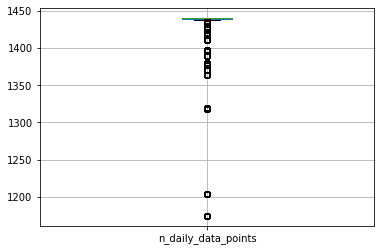

In [35]:
# Checking for Outliers in our daily data points variable
#

autolib.boxplot(['n_daily_data_points'])

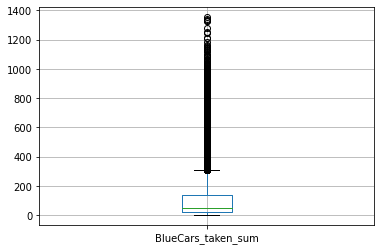

In [36]:
# Checking outliers in 'BlueCars taken sum' variable

autolib.boxplot(['BlueCars_taken_sum'])

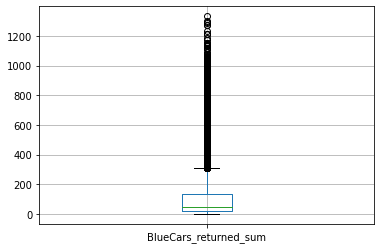

In [37]:
# Checking outliers in our 'BlueCars_returned_sum' age variable.

autolib.boxplot(['BlueCars_returned_sum'])

There are outliers in all the 3 continuous variables above. We will therefore remove them as they will affect our analysis.

In [43]:
# Checking for Anomalies
#

Q1 = autolib.quantile(0.25)
Q3 = autolib.quantile(0.75)

IQR = Q3 - Q1
IQR

Postal code               2070.0
n_daily_data_points          1.0
dayOfWeek                    4.0
BlueCars_taken_sum         115.0
BlueCars_returned_sum      115.0
Utilib_taken_sum             4.0
Utilib_returned_sum          4.0
Utilib_14_taken_sum          9.0
Utilib_14_returned_sum       9.0
Slots_freed_sum              5.0
Slots_taken_sum              5.0
dtype: float64

In [44]:
# Dealing and removing outliers

newauto = autolib[~((autolib < (Q1 - 1.5 * IQR)) |(autolib > (Q3 + 1.5 * IQR))).any(axis=1)]

newauto.shape

(9783, 13)

**After dealing with the outliers we remain with 9783 rows. This is a large reduction and therefore I choose to keep the outliers since a hug part of the data set has been cut off. Removing them will lead to invalid results; therefore, we keep the outliers in this dataset.**

## 6. Univariate Analysis

Categorical Variables

1. Frequency Tables
2. Bar charts and Histograms


In [64]:
# Finding the frequncies of the day_type column.

autolib[{'day_type'}].value_counts()

day_type
weekday     11544
weekend      4541
dtype: int64

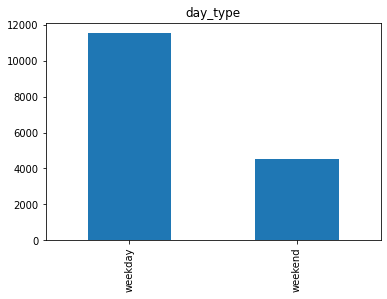

In [62]:
# plotting a bar chart for 'day type'

autolib['day_type'].value_counts().plot.bar(title='day_type')

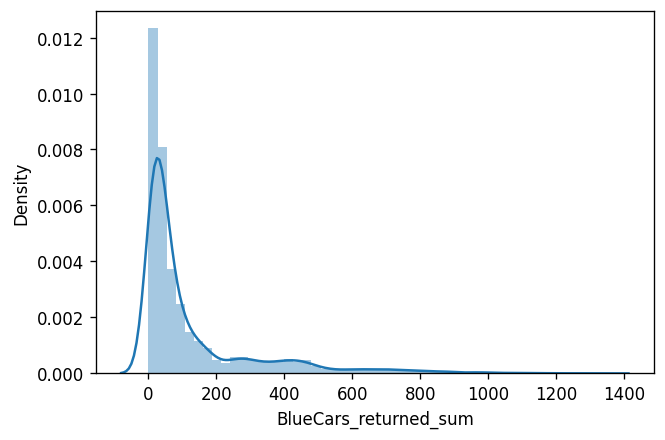

In [83]:
# Plotting a distribution graph for 'blue cars taken'

plt.figure(dpi = 120)
sns.distplot(autolib['BlueCars_returned_sum'], bins=50)

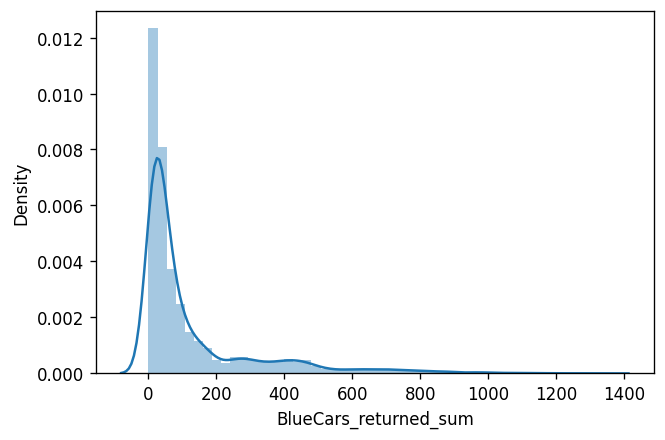

In [84]:
# Plotting a distribution graph for 'blue cars returned'

plt.figure(dpi = 120)
sns.distplot(autolib['BlueCars_returned_sum'], bins=50)

Numerical Variables

Measures of central tendency

1. Mean
2. Mode
3. Median

Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number which can estimate the value of whole data set.



In [47]:
# Finding the mean of the dataset

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'}].mean()

BlueCars_taken_sum         125.926951
Utilib_14_taken_sum          8.600560
Utilib_taken_sum             3.698290
Slots_taken_sum             22.629282
Slots_freed_sum             22.629033
BlueCars_returned_sum      125.912714
Utilib_14_returned_sum       8.599192
Utilib_returned_sum          3.699099
n_daily_data_points       1431.330619
dtype: float64

In [54]:
# Finding the mode of the dataset

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'}].mode()

,BlueCars_taken_sum,Utilib_14_taken_sum,Utilib_taken_sum,Slots_taken_sum,Slots_freed_sum,BlueCars_returned_sum,Utilib_14_returned_sum,Utilib_returned_sum,n_daily_data_points
0,12,0,0,0,0,13,0,0,1440


In [55]:
# Finding the median of the dataset

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'}].median()

BlueCars_taken_sum          46.0
Utilib_14_taken_sum          3.0
Utilib_taken_sum             1.0
Slots_taken_sum              0.0
Slots_freed_sum              0.0
BlueCars_returned_sum       46.0
Utilib_14_returned_sum       3.0
Utilib_returned_sum          1.0
n_daily_data_points       1440.0
dtype: float64

Measures of Dispersion

1.Standard Deviation 2.Variance 3.Range 4.Skewness 5.Quantiles 6.Kurtosis

Standard deviation (SD) is the measurement of average distance between each quantity and mean.

In [68]:
# Finding the standard deviation

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum',}].std()

BlueCars_returned_sum    185.501535
n_daily_data_points       33.212050
BlueCars_taken_sum       185.426579
dtype: float64

BlueCars_returned_sum and BlueCars_taken_sum are much more spread out from their mean while the 'n_daily_data_points' is much closer to its mean.

In [67]:
# Finding the variance

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum'}].var()

BlueCars_returned_sum    34410.819414
n_daily_data_points       1103.040274
BlueCars_taken_sum       34383.016113
dtype: float64

BlueCars_returned_sum, n_daily_data_points, BlueCars_taken_sum are further spread out from their mean and the numbers are not as close to each other as those with a lower varaince

Range is the difference between lowest and highest value.

In [72]:
# Finding the min and max values of the daily data points variable

auto_max = autolib['n_daily_data_points'].max()
auto_min = autolib['n_daily_data_points'].min()

# Calculating the range
auto_max - auto_min

266

In [73]:
# Finding the min and max values of the blue cars taken variable

auto_max = autolib['BlueCars_taken_sum'].max()
auto_min = autolib['BlueCars_taken_sum'].min()

# Calculating the range
auto_max - auto_min

1352

In [74]:
# Finding the min and max values of the blue cars returned variable

auto_max = autolib['BlueCars_returned_sum'].max()
auto_min = autolib['BlueCars_returned_sum'].min()

# Calculating the range
auto_max - auto_min

1332

In [75]:
# Finding the skewness

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum'}].skew()

BlueCars_returned_sum    2.412085
n_daily_data_points     -5.742776
BlueCars_taken_sum       2.406355
dtype: float64

'BlueCars_taken_sum' and 'BlueCars_returned_sum' are positively skewed and is skewed to the right. 'n_daily_data_points' is negatively skewed(skewed to the left)

In [76]:
# Finding the qualitilles

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum',}].quantile([0.25,0.5,0.75])

,BlueCars_returned_sum,n_daily_data_points,BlueCars_taken_sum
0.25,20.0,1439.0,20.0
0.50,46.0,1440.0,46.0
0.75,135.0,1440.0,135.0


Quartiles are values that divide your data into quarters provided data is sorted in an ascending order. There are three quartile values. First quartile value is at 25 percentile. Second quartile is 50 percentile and third quartile is 75 percentile. Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. Third Quartile (Q3) is median of lower half of the data.

In [77]:
# Calulating kurtosis

autolib[{'n_daily_data_points','BlueCars_taken_sum', 'BlueCars_returned_sum',}].kurt()

BlueCars_returned_sum     6.186288
n_daily_data_points      36.594846
BlueCars_taken_sum        6.172692
dtype: float64

This also displays that the kurtosis is greater than +1 which means that the data has heavier tails than a normal distribution and their distribution is too peaked.

## 7. Bivariate analysis

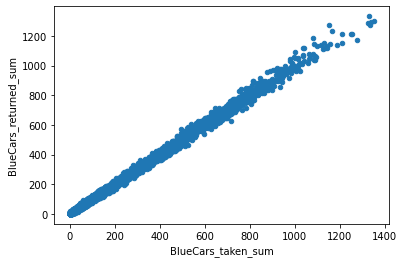

In [98]:
# Using Pandas Plotting our scatterplot to compare the variables

autolib.plot(x = 'BlueCars_taken_sum', y ='BlueCars_returned_sum' , kind='scatter')

# The scatter plot shows there's is a positive correlation between sum of blue cars taken and sum of bluecars returned.

In [99]:
# Calculating the pearson correlation coefficient

coeff = autolib['BlueCars_taken_sum'].corr(autolib['BlueCars_returned_sum']) 

print(coeff)

# There is a positive correlation between  between blue cars taken and blue cars returned.
# this means when one variable increases the other increases too and viceversa.

0.9986597051672199


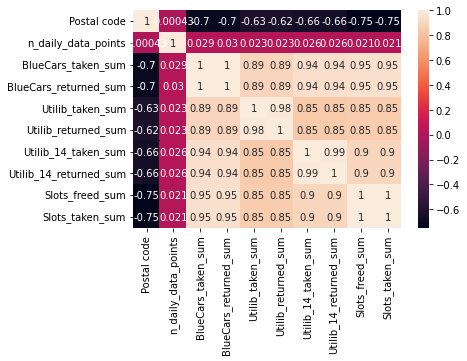

In [103]:
# generating a heatmap for the numerical variables

sns.heatmap(autolib.corr(),annot=True)
plt.show()

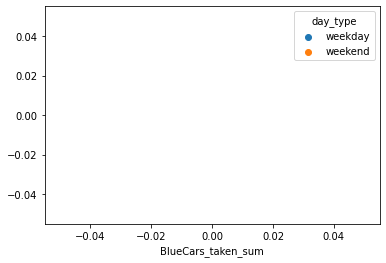

In [109]:
sns.scatterplot( x = 'BlueCars_taken_sum', y = 'dayOfWeek', hue = 'day_type', data= autolib)

In [130]:
# Calculating the number of cars taken from each postal code. 
# The postal code with the highest mumber of blue cars taken is 75015 followed by 75016.

df=autolib.groupby(['Postal code'])['BlueCars_taken_sum', 'BlueCars_returned_sum'].agg('sum')

df.sort_values('BlueCars_taken_sum', ascending= False).head()

,BlueCars_taken_sum,BlueCars_returned_sum
Postal code,,
75015,139925,139943
75016,123287,123222
75017,114581,114541
75013,84489,84449
75019,81973,82023


## 8. Hypothesis testing

Assumptions

1. Distribution is normal
2. Sample is randomly selected from the population
3. Sample data is representative of the whole population and can therefore estimate population parameters
4. variances of the population and sample are equal


**Null Hypothesis**: Bluecars taken from postal code 75015 is equal to the number of cars taken from postal code 75017.

**Alternative Hypothesis**: Bluecars taken from postal code 75015 is not equal to the number of cars taken from postal code 75017.


Sampling

In [110]:
# Taking a sample from the autolib dataset through Simple Random Sampling;
# 

sample = autolib.sample(n=2500,replace='False')
print(sample)

       Postal code       date  n_daily_data_points dayOfWeek day_type  \
13650        94130   3/5/2018                 1440       NaN  weekday   
8734         92390  1/14/2018                 1440       NaN  weekend   
7275         92290  4/16/2018                 1440       NaN  weekday   
4077         91370  1/23/2018                 1439       NaN  weekday   
15168        94500  1/20/2018                 1439       NaN  weekend   
...            ...        ...                  ...       ...      ...   
2548         75017  2/22/2018                 1440       NaN  weekday   
1276         75009  1/29/2018                 1440       NaN  weekday   
14559        94300   2/3/2018                 1438       NaN  weekend   
15067        94450  3/19/2018                 1440       NaN  weekday   
12145        93400  4/23/2018                 1417       NaN  weekday   

       BlueCars_taken_sum  BlueCars_returned_sum  Utilib_taken_sum  \
13650                  31                     29     

In [ ]:
# Dropping the unnecessary columns

sample.drop(['date', 'n_daily_data_points', 'dayOfWeek', 'day_type', 'Utilib_taken_sum', 'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 
             'Slots_freed_sum', 'Slots_taken_sum', 'dayofweek'], axis = 1, inplace = True) 

In [116]:
# Previewing our sample


sample.head(5)

,Postal code,BlueCars_taken_sum,BlueCars_returned_sum
13650,94130,31,29
8734,92390,5,7
7275,92290,9,13
4077,91370,5,7
15168,94500,35,34


Mean and Standard deviation

In [117]:
# Finding the mean of the blue cars taken from our sample

sample.BlueCars_taken_sum.mean()

127.1792

In [118]:
# Finding the standard deviation of the blue cars taken of our sample

sample.BlueCars_taken_sum.std()

188.27865154501995

Calculating p-value

In [121]:
# First calculating the z_score  
# With population mean = 125.926951, a sample size of 2500 and sample mean of 127.1792 and sample std of 188.27865154501995


z_score = (127.1792 - 125.926951) / (188.27865154501995 / (math.sqrt(2500)))
z_score

0.33255204180718345

In [124]:
# Computing the z- score

scipy.stats.norm.sf(abs(0.33255204180718345))*2

0.7394724497329808

Our P-value 0.739 is greater than 0.05 significance level.
Therefore we fail to reject the null hypothesis.

## 9. Interpration and conclusions

The autolib analysis should aim to give insights that steer major decisions in the company, for instance maximizing profits and customer satisfaction and support.
From the hypothesis test, it was observed that the p-value was higher than the set significance level of 0.05, therefore there is no sufficient evidence to show that Blue Cars taken from postal code 75015 is equal to the number of cars taken from postal code 75017.
The full report can be found [here](https://docs.google.com/document/d/1mWRqo_TSPLO4YxN9F77AOJlCoethn1B9IcBtHQMUjS8/edit?usp=sharing)